In [2]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [3]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

In [4]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

#     #### load data
# with open(in_path +'M194_M220_ACA_bin4.pkl', 'rb') as f:
#     aca_bin = pickle.load(f)   

# #### load data
# with open(in_path +'M194_M220_ACA_countN4.pkl', 'rb') as f:
#     aca_countN = pickle.load(f)

# Data Processing

In [5]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]
# omc_preprocess = dfs_preprocess_counts(omc_type) # normalize by dataset median

# countN processing
omc_cleanN = [clean_up_data(df) for df in omc_countN]
omc_typeN = [sort_by_celltype(df) for df in omc_cleanN]
omc_preprocessN = dfs_preprocess_counts(omc_typeN) # normalize by dataset median



# Heatmaps

## individual animal

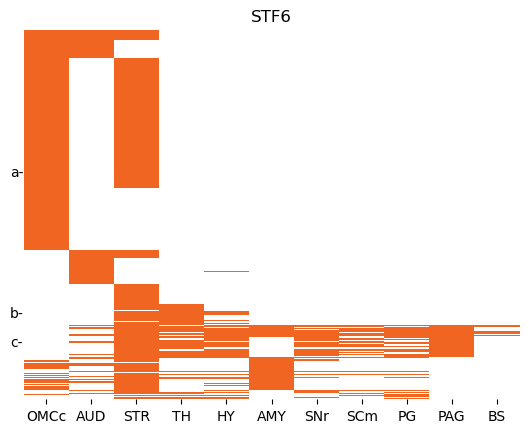

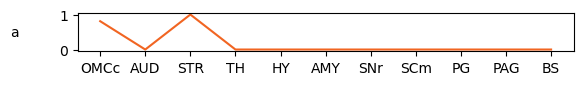

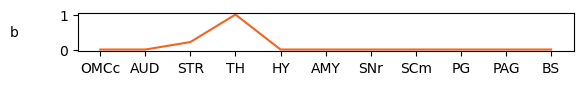

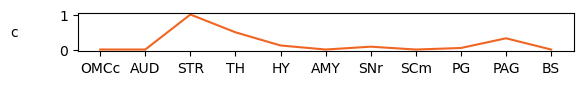

In [7]:
# plot STF6 only, mice[10]
i=10
sort_order = ["type", 'OMCc', 'AUD', 'STR', 'TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG', 'PAG',
       'BS']
neurons = {"a":400, "b":800, "c":884}
sorted_heatmap(omc_preprocess[i], sort_by=[], title=mice[i], drop=["OMCi", "type"],
               label_neurons=neurons)
plt.show()

# for key in neurons.keys():
#        single_neuron_heatmap(omc_preprocess[i], neurons[key], label=key, sort_by=[])
#        plt.show()

for key in neurons.keys():
       single_neuron_line(omc_preprocessN[i], neurons[key], label=key, sort_by=[])
       plt.show()

## n=1000 species summary

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


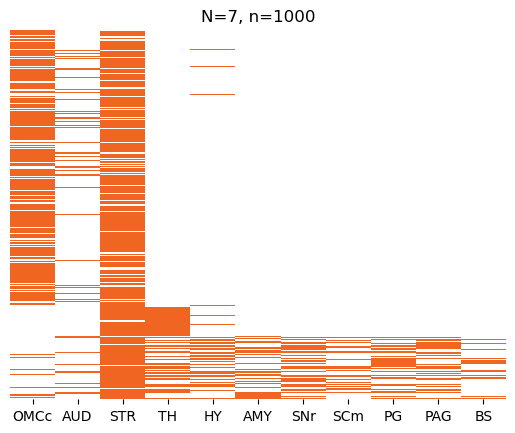

In [8]:
# plot STF6 only
stidx = [i for i in range(len(species)) if species[i]=="STeg"]
omc_st = np.take(omc_preprocess, stidx) # just get steg from list
plot_st = pd.concat(omc_st)
sorted_heatmap(plot_st, sort_by=['type'], title="N=7, n=1000", drop=["OMCi", "type"],
               nsample=1000)
plt.show()

# umap/clustering???

# Polar plots

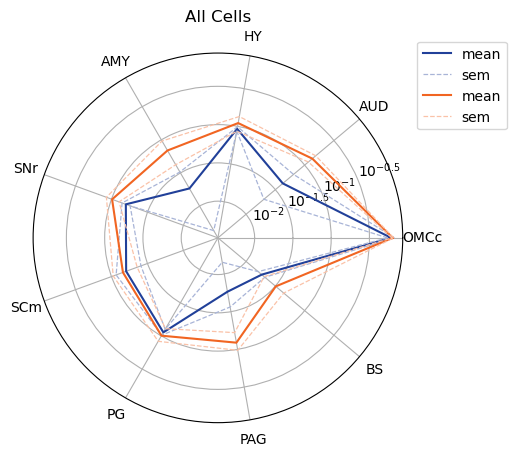

In [11]:
proportion_polar_plot(omc_type, title="All Cells")
plt.show()

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(valu

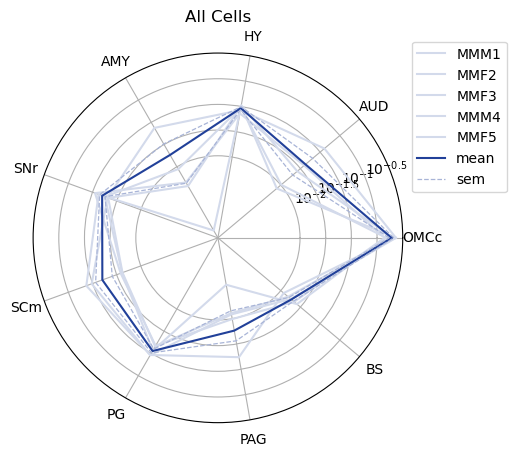

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values.loc[len(values)+1] = values.loc[0]
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:194: SettingWithCopyWarning: 
A value is trying to be set

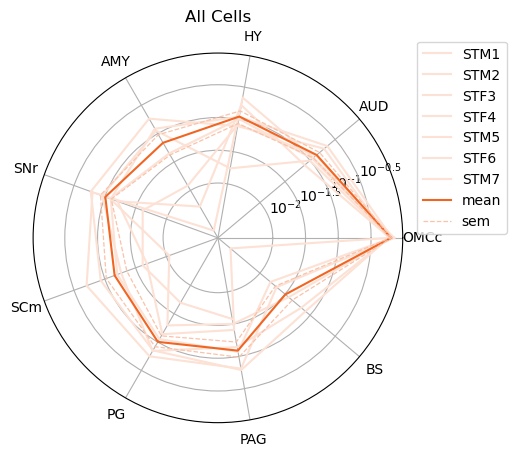

In [62]:
omc_mm = [omc_type[i] for i in range(len(omc_type)) if species[i]=="MMus"]
meta_mm = metadata[metadata["species"]=="MMus"].reset_index(drop=True)

proportion_polar_plot(omc_mm, title="All Cells", plot_individuals=True, meta=meta_mm)
plt.show()

omc_st = [omc_type[i] for i in range(len(omc_type)) if species[i]=="STeg"]
meta_st = metadata[metadata["species"]=="STeg"].reset_index(drop=True)

proportion_polar_plot(omc_st, title="All Cells", plot_individuals=True, meta=meta_st)
plt.show()

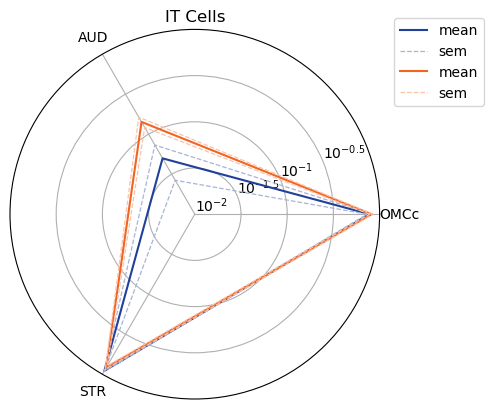

In [53]:
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
proportion_polar_plot(omc_it, title="IT Cells", cell_type="IT")
plt.show()


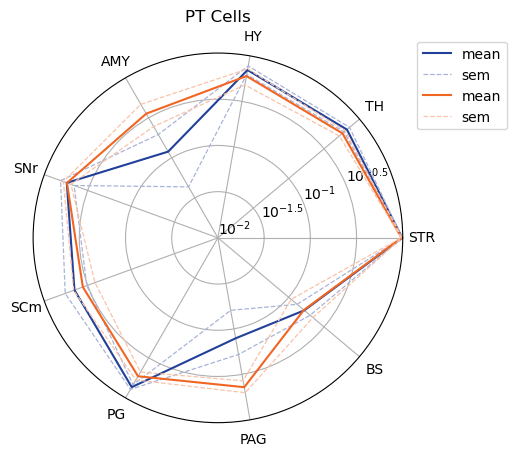

In [54]:
omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
proportion_polar_plot(omc_pt, title="PT Cells", cell_type="PT")
plt.show()


# Dot Plots

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


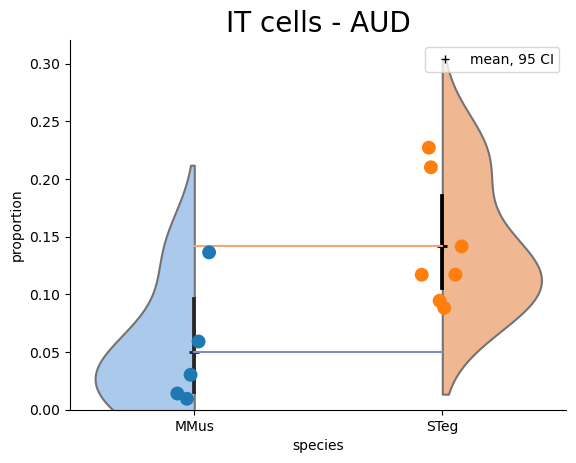

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


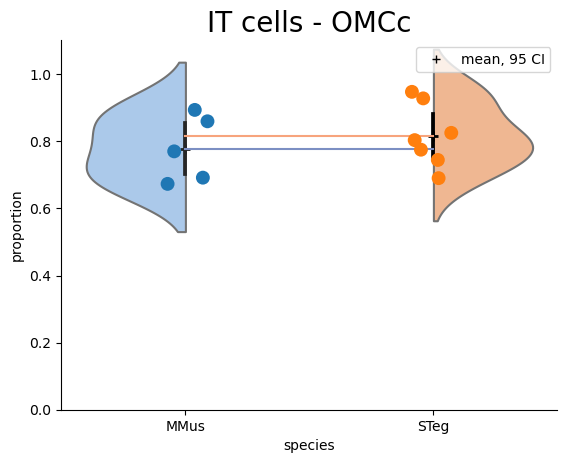

In [7]:
# IT
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
plot_df = dfs_to_proportions(omc_it, cell_type="IT")

# AUD
area_proportion_dot_plot(plot_df, "AUD", title="IT cells - AUD")
plt.show()

# OMCc
area_proportion_dot_plot(plot_df, "OMCc", title="IT cells - OMCc")
plt.show()


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


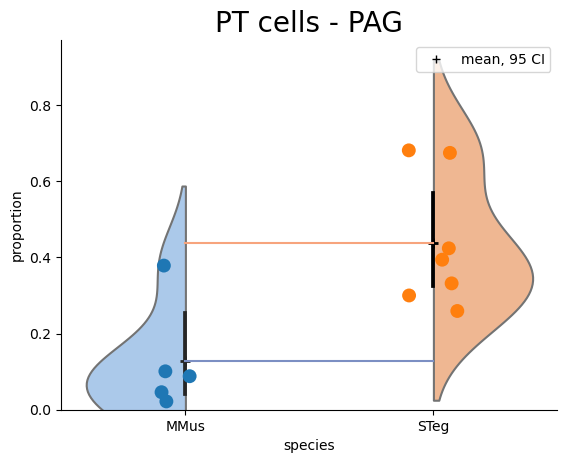

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


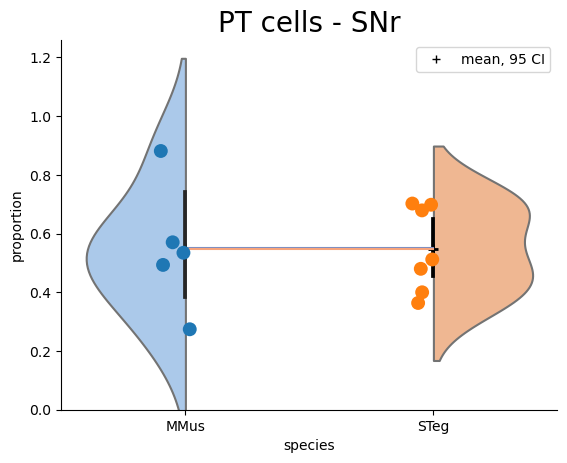

In [8]:

omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
plot_df = dfs_to_proportions(omc_pt, cell_type="PT")

# PAG
area_proportion_dot_plot(plot_df, "PAG", title="PT cells - PAG")
plt.show()

# SNr
area_proportion_dot_plot(plot_df, "SNr", title="PT cells - SNr")
plt.show()

# Volcano Plots

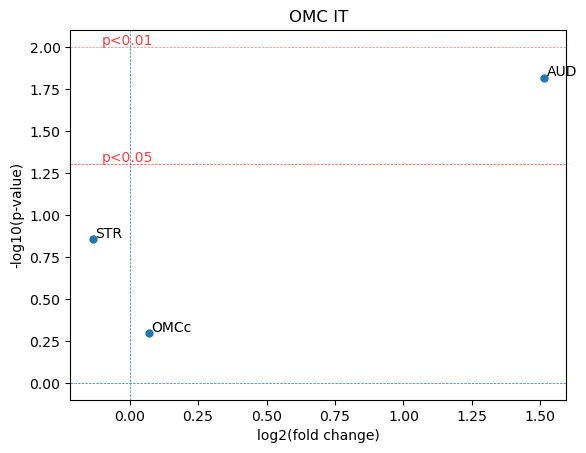

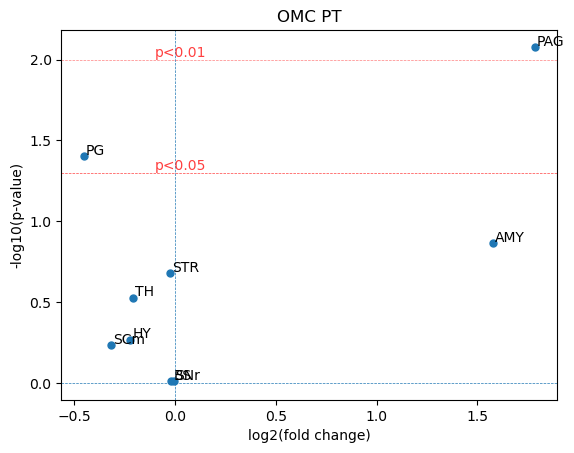

In [169]:
# IT
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
plot_df = dfs_to_proportions(omc_it, cell_type="IT")
vplot_df = proportion_ttest(plot_df)
proportion_volcano_plot(vplot_df, title="OMC IT")
plt.show()

# PT
omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
plot_df = dfs_to_proportions(omc_pt, cell_type="PT")
vplot_df = proportion_ttest(plot_df)
proportion_volcano_plot(vplot_df, title="OMC PT")
plt.show()

# Fold Change Rank order plots

In [37]:
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
plot_it = dfs_to_proportions(omc_it, cell_type="IT")
vplot_it = proportion_ttest(plot_it)
vplot_it = vplot_it[~(vplot_it['area']=="STR")]
vplot_it['type'] = "IT"

omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
plot_pt = dfs_to_proportions(omc_pt, cell_type="PT")
vplot_pt = proportion_ttest(plot_pt)
vplot_pt = vplot_pt[~(vplot_pt['area']=="STR") & ~(vplot_pt['area']=="TH")]
vplot_pt['type'] = "PT"

plot = pd.concat([vplot_it, vplot_pt])
plot = plot.sort_values("log2_fc", ascending=False).reset_index(drop=True)
plot


,area,p-value,mm_mean,st_mean,fold_change,log2_fc,nlog10_p,type
0,PAG,0.008353,0.127028,0.437745,3.446048,1.784943,2.078166,PT
1,AMY,0.136524,0.119524,0.356350,2.981415,1.575997,0.864792,PT
2,AUD,0.015257,0.049884,0.142284,2.852322,1.512137,1.816517,IT
3,OMCc,0.505529,0.777684,0.816308,1.049665,0.069929,0.296254,IT
4,SNr,0.978673,0.550720,0.547871,0.994827,-0.007483,0.009362,PT
5,BS,0.976264,0.166127,0.163909,0.986646,-0.019395,0.010433,PT
6,HY,0.540858,0.699379,0.599752,0.857549,-0.221709,0.266916,PT
7,SCm,0.583934,0.448872,0.359656,0.801243,-0.319688,0.233636,PT
8,PG,0.039566,0.733787,0.536432,0.731046,-0.451965,1.402676,PT


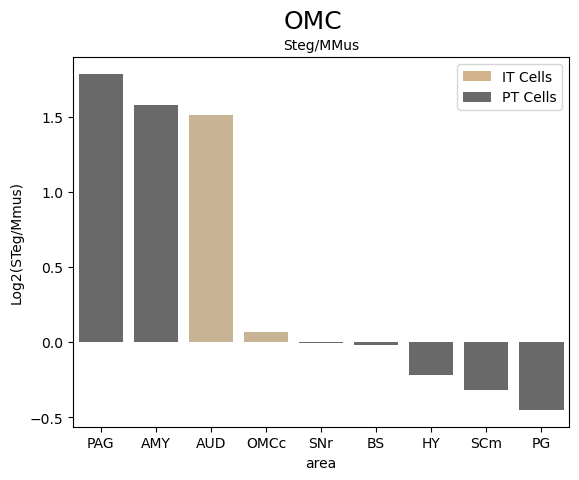

In [42]:
from matplotlib.patches import Patch

cols = []
for type in plot['type']:
    if type=="IT":
        cols.append("tan")
    else:
        cols.append("dimgrey")

legend_elements = [Patch(facecolor='tan', label='IT Cells'),
                   Patch(facecolor='dimgrey', label='PT Cells')]

sns.barplot(plot, x="area", y="log2_fc", palette=cols)
plt.legend(handles=legend_elements)
plt.suptitle("OMC", size=18)
plt.title("Steg/MMus", size=10)
plt.ylabel("Log2(r'\frac{Steg}{\MMus}$')")
plt.show()

## null fold change model

In [63]:
# self correlation w/in mmus

omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]


omc_it_mm = [omc_it[i] for i in range(num_samples) if species[i]=="MMus"]
omc_it_st = [omc_it[i] for i in range(num_samples) if species[i]=="STeg"]

print("species\tmice\tIT_count")
for i in range(num_samples):
    if species[i]=="MMus":
        print(species[i],"\t",mice[i], "\t", omc_it[i].shape[0])

steg_it_ns = []
for i in range(num_samples):
    if species[i]=="STeg":
        steg_it_ns.append(omc_it[i].shape[0])
        print(species[i],"\t",mice[i], "\t", omc_it[i].shape[0])

print("\n")
print("Steg mean:", np.mean(steg_it_ns))
print("Steg median:", np.median(steg_it_ns))

species	mice	IT_count
MMus 	 MMM1 	 8329
MMus 	 MMF2 	 13069
MMus 	 MMF3 	 11654
MMus 	 MMM4 	 5204
MMus 	 MMF5 	 15264
STeg 	 STM1 	 538
STeg 	 STM2 	 452
STeg 	 STF3 	 317
STeg 	 STF4 	 675
STeg 	 STM5 	 381
STeg 	 STF6 	 779
STeg 	 STM7 	 528


Steg mean: 524.2857142857143
Steg median: 528.0


In [104]:
# sample 2 non-overlapping groups of 528 neurons from each individual

meta_mm = metadata[metadata["species"]=="MMus"]
omc_it_mm = np.take(omc_it, meta_mm.index)

meta_st = metadata[metadata["species"]=="STeg"]
omc_it_st = np.take(omc_it, meta_st.index)


group1 = []
group2 = []
for i in range(meta_mm.shape[0]):
    df = omc_it_mm[i]
    shuffle = df.sample(1050, axis=0).reset_index(drop=True)
    split1 = shuffle.iloc[:528]
    split2 = shuffle.loc[528:]
    group1.append(split1)
    group2.append(split2)

gr1_prop = dfs_to_proportions(group1, cell_type="IT", meta=meta_mm.reset_index(drop=True))
gr2_prop = dfs_to_proportions(group2, cell_type="IT", meta=meta_mm.reset_index(drop=True))


# # plot = pd.DataFrame()
# # calc means
gr1_mean = gr1_prop.groupby(["area"])['proportion'].mean()
gr2_mean = gr2_prop.groupby(['area'])['proportion'].mean()
# pd.DataFrame({"area":m1.index.values, 
#               "g1_prop":m1, 
#               "g2_prop":m2, 
#               "fc":m1/m2, 
#               "log2fc":np.log2(m1/m2),
#               "type":"IT"}).reset_index(drop=True)
# fc = m1/m2

# fc




/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


area
AUD     0.047348
OMCc    0.770455
STR     0.903030
Name: proportion, dtype: float64

In [106]:
# simulate sampling and fc calculation
reps = 100

fc_sims = []
for n in range(reps):

    # sample 2 groups of 528 neurons from each mm mouse
    group1 = []
    group2 = []
    for i in range(meta_mm.shape[0]):
        df = omc_it_mm[i]
        shuffle = df.sample(1050, axis=0).reset_index(drop=True)
        split1 = shuffle.iloc[:528]
        split2 = shuffle.loc[528:]
        group1.append(split1)
        group2.append(split2)

    # calculate proportions per area of neurons project to area
    gr1_prop = dfs_to_proportions(group1, cell_type="IT", meta=meta_mm.reset_index(drop=True))
    gr2_prop = dfs_to_proportions(group2, cell_type="IT", meta=meta_mm.reset_index(drop=True))

    # calc mean across mm individs per area
    m1 = gr1_prop.groupby(["area"])['proportion'].mean()
    m2 = gr2_prop.groupby(['area'])['proportion'].mean()

    # add fc to array
    fc_sims.append(m1/m2)
    


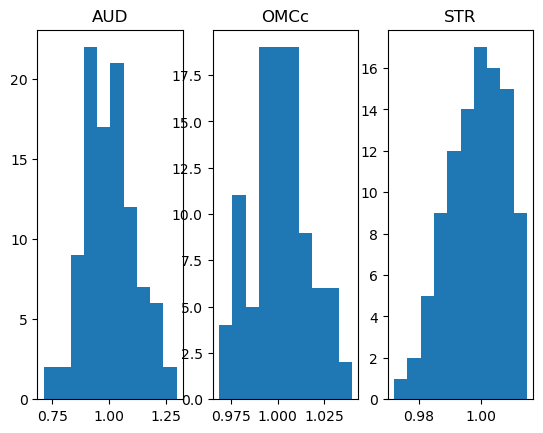

In [123]:
fc_array = np.array(fc_sims)

fig, axs = plt.subplots(1,3)
i=0
for ax in axs.flat:
    ax.hist(fc_array[:,i])
    ax.set_title(m1.index[i])
    i+=1

In [131]:
mm_it_fc = pd.DataFrame({"area":m1.index.values, "fold_change":fc_array.mean(axis=0), "type":"IT"})
mm_it_fc

,area,fold_change,type
0,AUD,1.003729,IT
1,OMCc,1.001108,IT
2,STR,0.998818,IT


In [133]:
# simulate sampling and fc calculation
meta_mm = metadata[metadata["species"]=="MMus"]
omc_pt_mm = np.take(omc_pt, meta_mm.index)

reps = 100

fc_sims = []
for n in range(reps):

    # sample 2 groups of 528 neurons from each mm mouse
    group1 = []
    group2 = []
    for i in range(meta_mm.shape[0]):
        df = omc_pt_mm[i]
        shuffle = df.sample(1050, axis=0).reset_index(drop=True)
        split1 = shuffle.iloc[:528]
        split2 = shuffle.loc[528:]
        group1.append(split1)
        group2.append(split2)

    # calculate proportions per area of neurons project to area
    gr1_prop = dfs_to_proportions(group1, cell_type="PT", meta=meta_mm.reset_index(drop=True))
    gr2_prop = dfs_to_proportions(group2, cell_type="PT", meta=meta_mm.reset_index(drop=True))

    # calc mean across mm individs per area
    m1 = gr1_prop.groupby(["area"])['proportion'].mean()
    m2 = gr2_prop.groupby(['area'])['proportion'].mean()

    # add fc to array
    fc_sims.append(m1/m2)
    

fc_array = np.array(fc_sims)
fc_array.shape


fig, axs = plt.subplots(3,3, figsize=(10,10))
i=0
for ax in axs.flat:
    ax.hist(fc_array[:,i])
    ax.set_title(m1.index[i])
    i+=1
plt.show()

mm_pt_fc = pd.DataFrame({"area":m1.index.values, "fold_change":fc_array.mean(axis=0), "type":"PT"})
mm_pt_fc

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


(100, 9)

In [143]:
mm_fc['type']

0    IT
1    IT
2    IT
0    PT
1    PT
2    PT
3    PT
4    PT
5    PT
6    PT
7    PT
8    PT
Name: type, dtype: object

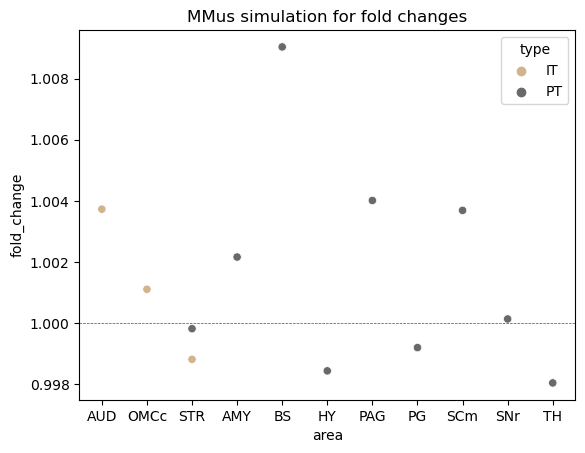

In [148]:
mm_fc = pd.concat([mm_it_fc, mm_pt_fc])
mm_fc

sns.scatterplot(mm_fc, x="area", y="fold_change", hue="type", 
                palette=["tan", "dimgrey"])
plt.title("MMus simulation for fold changes")
plt.axhline(y=1, color='red', linestyle="--", lw=0.5)



In [152]:
mm_fc['log2fc'] = np.log2(mm_fc['fold_change'])
mm_fc

,area,fold_change,type,log2fc
0,AUD,1.003729,IT,0.005370
1,OMCc,1.001108,IT,0.001598
2,STR,0.998818,IT,-0.001706
0,AMY,1.002163,PT,0.003118
1,BS,1.009035,PT,0.012977
2,HY,0.998441,PT,-0.002251
3,PAG,1.004013,PT,0.005778
4,PG,0.999201,PT,-0.001152
5,SCm,1.003689,PT,0.005312
6,SNr,1.000138,PT,0.000199


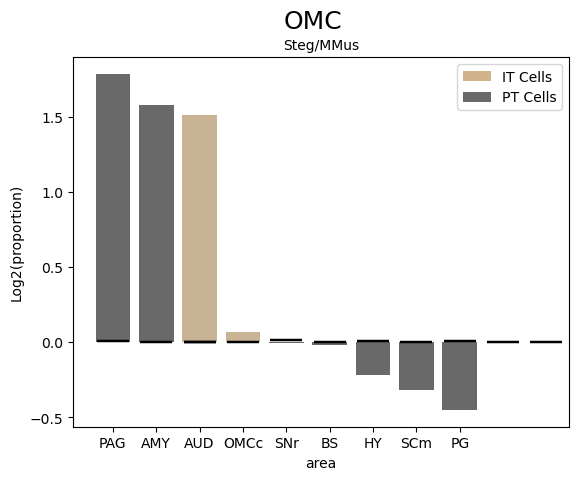

In [168]:

cols = []
for type in plot['type']:
    if type=="IT":
        cols.append("tan")
    else:
        cols.append("dimgrey")

legend_elements = [Patch(facecolor='tan', label='IT Cells'),
                   Patch(facecolor='dimgrey', label='PT Cells')]

sns.barplot(plot, x="area", y="log2_fc", palette=cols)
plt.legend(handles=legend_elements)
plt.suptitle("OMC", size=18)
plt.title("Steg/MMus", size=10)
plt.ylabel("Log2(proportion)")

sns.scatterplot(mm_fc, x="area", y="log2fc", marker="_", color="black",
                s=500)
plt.show()